# Import Libraries

In [1]:
import torch
import torch.nn as nn
from torchvision import datasets ,transforms
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim
from torch.autograd import Variable
import torchvision

# Load data for training and testing

In [2]:
#load images from the folder and set the folder name as labels

train_data = datasets.ImageFolder(
    '/home/austin/trailnet-testing-Pytorch/2020_summer/src/deep_learning/data/Lane_data/train_data',
    transform = transforms.Compose([transforms.ToTensor()])                         
)

test_data = datasets.ImageFolder(
    '/home/austin/trailnet-testing-Pytorch/2020_summer/src/deep_learning/data/Lane_data/test_data',
    transform = transforms.Compose([transforms.ToTensor()])                         
)
#package data for training and testing

train_loader = torch.utils.data.DataLoader(train_data, batch_size=20,shuffle= True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=20,shuffle=True)

#show labels

print(train_data.classes)
print(train_data.class_to_idx)

['L', 'R', 'S']
{'S': 2, 'R': 1, 'L': 0}


# CNN Net Work Define

In [3]:
class CNN_Model(nn.Module):
    def __init__(self):
        super(CNN_Model, self).__init__()
        self.conv1 = nn.Sequential(              
            nn.Conv2d(
                in_channels=3,              
                out_channels=32,            
                kernel_size=4,              
                stride=1,                   
                padding=0,                  
            ),                                                 
            nn.MaxPool2d(kernel_size=2, stride=2),    
        )
        self.conv2 = nn.Sequential(         
            nn.Conv2d(
                in_channels=32,
                out_channels=32,
                kernel_size=4,
                stride=1,
                padding=0,
            ),                           
            nn.MaxPool2d(kernel_size=2, stride=2),                
        )
        self.conv3 = nn.Sequential(         
            nn.Conv2d(
                in_channels=32,
                out_channels=32,
                kernel_size=4,
                stride=1,
                padding=0,
            ),                           
            nn.MaxPool2d(kernel_size=2, stride=2),                
        )
        self.conv4 = nn.Sequential(         
            nn.Conv2d(
                in_channels=32,
                out_channels=32,
                kernel_size=4,
                stride=1,
                padding=1,
            ),                           
            nn.MaxPool2d(kernel_size=2, stride=2),                
        )
        self.fc1 = nn.Linear(34048, 200)
        self.fc2 = nn.Linear(200, 3)
    

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.fc2(x)
        return x

net = CNN_Model().cuda()
criterion = nn.CrossEntropyLoss().cuda()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Start training

In [4]:
for epoch in range(10): # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the input
        inputs, labels = data

        # wrap time in Variable
        inputs, labels = Variable(inputs).cuda(), Variable(labels).cuda()

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 20 == 0:   # print every 20 mini-batches
            print('[%d, %d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 20))
            running_loss = 0.0

print('Finished Training')

[1, 1] loss: 0.055
[1, 21] loss: 1.100
[1, 41] loss: 1.094
[2, 1] loss: 0.054
[2, 21] loss: 1.071
[2, 41] loss: 0.990
[3, 1] loss: 0.041
[3, 21] loss: 0.500
[3, 41] loss: 0.266
[4, 1] loss: 0.004
[4, 21] loss: 0.117
[4, 41] loss: 0.099
[5, 1] loss: 0.022
[5, 21] loss: 0.065
[5, 41] loss: 0.090
[6, 1] loss: 0.000
[6, 21] loss: 0.057
[6, 41] loss: 0.114
[7, 1] loss: 0.024
[7, 21] loss: 0.057
[7, 41] loss: 0.055
[8, 1] loss: 0.002
[8, 21] loss: 0.066
[8, 41] loss: 0.046
[9, 1] loss: 0.000
[9, 21] loss: 0.063
[9, 41] loss: 0.027
[10, 1] loss: 0.000
[10, 21] loss: 0.030
[10, 41] loss: 0.040
Finished Training


# Accuracy evaluation

In [5]:
print('Accuracy testing...')

correct = 0
total = 0
for data in test_loader:
    images, labels = data
    images = images.cuda()
    labels = labels.cuda()
    with torch.no_grad():
        outputs = net(Variable(images))
        _,predicted = torch.max(outputs.data,1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))

Accuracy testing...
Accuracy of the network on the test images: 95 %


# Randomly select a picture to predict

Image Label:R
Predicted Label:R


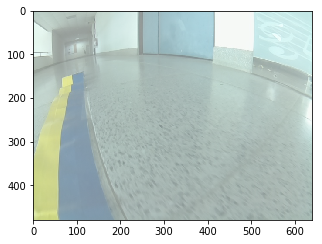

In [9]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.cpu().numpy()
    plt.figure(figsize=(5,5))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

test_single_loader = torch.utils.data.DataLoader(test_data, batch_size=1,shuffle=True)

dataiter = iter(test_single_loader)
images, labels = dataiter.next()
images = images.cuda()
labels = labels.cuda()
outputs = net(Variable(images))
_,predicted = torch.max(outputs.data,1)

if labels == 0:
    print('Image Label:L')
if labels == 1:
    print('Image Label:R')
if labels == 2:
    print('Image Label:S')
if predicted == 0:
    print('Predicted Label:L')
if predicted == 1:
    print('Predicted Label:R')
if predicted == 2:
    print('Predicted Label:S')

imshow(torchvision.utils.make_grid(images))

# Save net

In [6]:
torch.save(net.state_dict(), '/home/austin/trailnet-testing-Pytorch/2020_summer/src/deep_learning/src/trailnet.pth') # Save state_dict